## Predictive Maintenance Data 
This data science project will predict when a rotating machine will experience failure. 

UDI: unique identifier ranging from 1 to 10000.

Product ID: ID that includes product quality variants and a variant specific serial number

Type: Quality of the rotating machinery product consisting of a letter L, M, or H with L being low quality, M being medium quality, and H being high quality

AirTemp: Temperature of surrounding air during process in Kelvin. 

ProcessTemp: Temperature of the equipment during process in Kelvin.

RotateSpeed: Speed of rotating machinery during process in rpm.

Torque: Torque applied to shaft during process in Nm. 

ToolWear: Time required for the tool used in the process to become worn in minutes.

Target: Whether machine failure occured or not (0 no failure, 1 failure occured)

Failure Type: a description of the type of failure.

In [2]:
# importing the dataset
import pandas as pd 
import pandas_profiling as pp
import numpy as np
pred_dat = pd.read_csv(r'C:\Users\lilye\Downloads\predictive_maintenance.csv')
pred_dat

UDI Product ID Type  AirTemp  ProcessTemp  RotateSpeed  Torque  \
0         1     M14860    M    298.1        308.6         1551    42.8   
1         2     L47181    L    298.2        308.7         1408    46.3   
2         3     L47182    L    298.1        308.5         1498    49.4   
3         4     L47183    L    298.2        308.6         1433    39.5   
4         5     L47184    L    298.2        308.7         1408    40.0   
...     ...        ...  ...      ...          ...          ...     ...   
9995   9996     M24855    M    298.8        308.4         1604    29.5   
9996   9997     H39410    H    298.9        308.4         1632    31.8   
9997   9998     M24857    M    299.0        308.6         1645    33.4   
9998   9999     H39412    H    299.0        308.7         1408    48.5   
9999  10000     M24859    M    299.0        308.7         1500    40.2   

      ToolWear  FailureFlag Failure Type  
0            0            0   No Failure  
1            3            0   No Failure  
2            5            0   No Failure  
3            7            0   No Failure  
4            9            0   No Failure  
...        ...          ...          ...  
9995        14            0   No Failure  
9996        17            0   No Failure  
9997        22            0   No Failure  
9998        25            0   No Failure  
9999        30            0   No Failure  

[10000 rows x 10 columns]

## Exploratory Data Analysis

In [3]:
 # pandas profiling report to determine which columns to keep and which to drop 
from pandas_profiling import ProfileReport
prof_df = ProfileReport(pred_dat)
prof_df

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

I determined the features I got rid of by seeing what might not be as useful, the UDI number isn't exactly what we need for this feature. I eliminated AirTemp since there is a 0.9% correlation from the pandas profiling report. Also, since we already have a column telling whether it failed or not, I decided to eliminate the feature telling what type of failure. I thought the information from features UDI and Product ID was irrelevant to determining when a rotating machine experiences failure so they were eliminated. The target is the RotateSpeed, FailureFlag, and potentially toolwear to see when it is worn in respect to when it fails. As for pre-processing, the pandas profiling report indicates there is no missing values. 

In [4]:
df_new = pred_dat.drop(['UDI', 'AirTemp', 'Failure Type', 'Product ID'], axis=1)
df_new

Type  ProcessTemp  RotateSpeed  Torque  ToolWear  FailureFlag
0       M        308.6         1551    42.8         0            0
1       L        308.7         1408    46.3         3            0
2       L        308.5         1498    49.4         5            0
3       L        308.6         1433    39.5         7            0
4       L        308.7         1408    40.0         9            0
...   ...          ...          ...     ...       ...          ...
9995    M        308.4         1604    29.5        14            0
9996    H        308.4         1632    31.8        17            0
9997    M        308.6         1645    33.4        22            0
9998    H        308.7         1408    48.5        25            0
9999    M        308.7         1500    40.2        30            0

[10000 rows x 6 columns]

In [5]:
# vectorizing the categorical data
# type code key: 1=L 2=M 0=H
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_new['TypeCode'] = le.fit_transform(df_new['Type'])
df_new = df_new.drop('Type', axis=1)
df_new

ProcessTemp  RotateSpeed  Torque  ToolWear  FailureFlag  TypeCode
0           308.6         1551    42.8         0            0         2
1           308.7         1408    46.3         3            0         1
2           308.5         1498    49.4         5            0         1
3           308.6         1433    39.5         7            0         1
4           308.7         1408    40.0         9            0         1
...           ...          ...     ...       ...          ...       ...
9995        308.4         1604    29.5        14            0         2
9996        308.4         1632    31.8        17            0         0
9997        308.6         1645    33.4        22            0         2
9998        308.7         1408    48.5        25            0         0
9999        308.7         1500    40.2        30            0         2

[10000 rows x 6 columns]

In [6]:
# separating data into features and targets x is features and y is target
x_feature = df_new[['ProcessTemp', 'RotateSpeed', 'Torque', 'ToolWear', 'TypeCode']]
y_target = df_new[['FailureFlag']]


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_new.drop('FailureFlag', axis=1), df_new['FailureFlag'], 
                                                     train_size=0.75)


In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_train)
scaled_lr = LinearRegression()
scaled_lr.fit(scaled_features, y_train)
print(scaled_lr.score(scaled_features, y_train))


0.11830483014767235


In [8]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_train, y_train)

0.9712

The value is close to 1 which indicates a good model fit for Logistic Regression. 97.12% is a good prediction of the data.

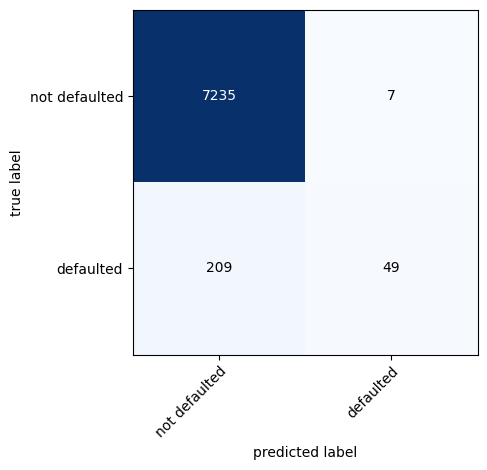

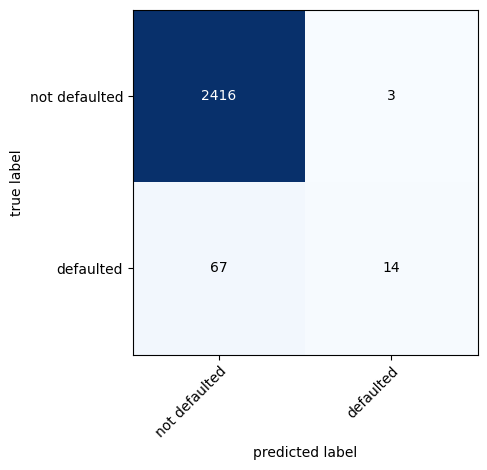

In [9]:
from mlxtend.plotting import plot_confusion_matrix as mlx_plot_cm
from sklearn.metrics import confusion_matrix

mlx_plot_cm(conf_mat=confusion_matrix(y_train, lr_model.predict(x_train)), class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

mlx_plot_cm(conf_mat=confusion_matrix(y_test, lr_model.predict(x_test)), class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import plot_roc_curve
roc = plot_roc_curve(lr_model, x_test, y_test, drop_intermediate=False)
youdens_idx = np.argmax(roc.tpr - roc.fpr)
thresholds = np.unique(lr_model.predict_proba(x_test)[:, 1])
thresholds.sort()
thresholds = [1] + list(thresholds[::-1])
ythresh = thresholds[youdens_idx]
ythresh 



C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.03417919497774678

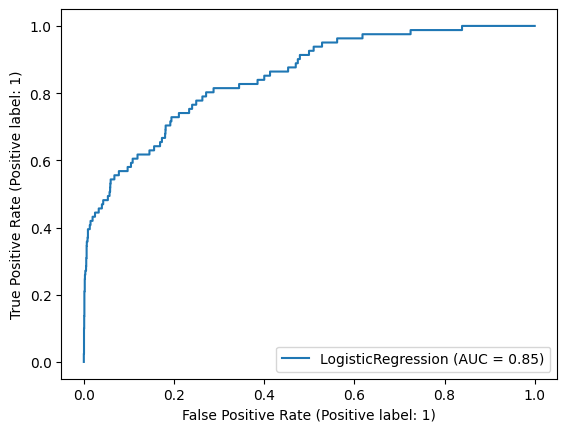

<Figure size 550x550 with 0 Axes>

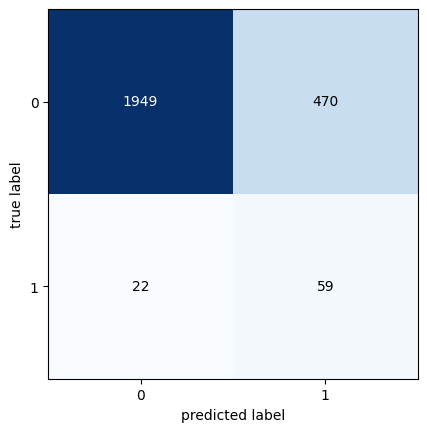

In [11]:
from mlxtend.plotting import plot_confusion_matrix as mlx_plot_cm
from sklearn.metrics import confusion_matrix

f = plt.figure(figsize=(5.5,5.5))
predictions = lr_model.predict_proba(x_test)[:, 1] >= ythresh
mlx_plot_cm(confusion_matrix(y_test, predictions))
f.tight_layout()
plt.show()

In [12]:
from sklearn.metrics import classification_report 
from sklearn.metrics import roc_auc_score 

print(classification_report(y_test, lr_model.predict(x_test), target_names=['no default', 'default']))

print(classification_report(y_train, lr_model.predict(x_train), target_names=['no default', 'default']))



print('ROC/AUC score:', roc_auc_score(y_test, lr_model.predict_proba(x_test)[:, 1]))

              precision    recall  f1-score   support

  no default       0.97      1.00      0.99      2419
     default       0.82      0.17      0.29        81

    accuracy                           0.97      2500
   macro avg       0.90      0.59      0.64      2500
weighted avg       0.97      0.97      0.96      2500

              precision    recall  f1-score   support

  no default       0.97      1.00      0.99      7242
     default       0.88      0.19      0.31       258

    accuracy                           0.97      7500
   macro avg       0.92      0.59      0.65      7500
weighted avg       0.97      0.97      0.96      7500

ROC/AUC score: 0.8497491566252762


C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


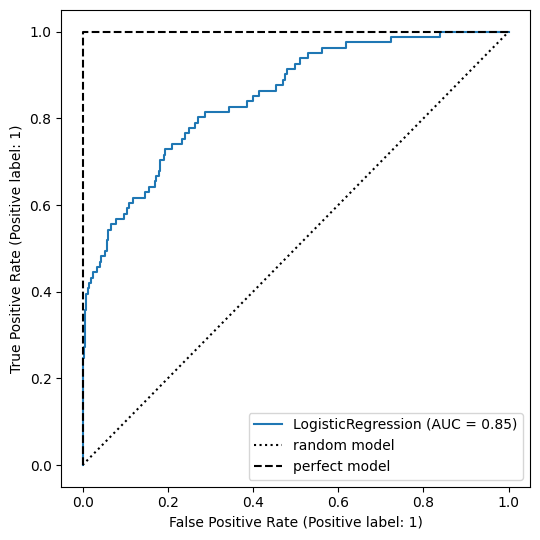

In [13]:
f1, ax1 = plt.subplots(1, 1, figsize=(5.5, 5.5))
roc1 = plot_roc_curve(lr_model, x_test, y_test, ax=ax1)
plt.plot([0,1], [0,1], c='k', linestyle='dotted', label='random model')
plt.plot([0, 0, 1], 
         [0, 1, 1], c='k', linestyle='dashed', label='perfect model')
plt.legend()
plt.tight_layout()
plt.show()

The logistic regression line in the ROC plot is not perfect, however it is not terrible predition. I would say its somewhere in the middle of the two based on the plot display. 

In [14]:
# Removing two more features: Going to remove TypeCode and Process Temp 
df_reduc = df_new.drop(['ProcessTemp', 'TypeCode'], axis=1)
df_reduc

RotateSpeed  Torque  ToolWear  FailureFlag
0            1551    42.8         0            0
1            1408    46.3         3            0
2            1498    49.4         5            0
3            1433    39.5         7            0
4            1408    40.0         9            0
...           ...     ...       ...          ...
9995         1604    29.5        14            0
9996         1632    31.8        17            0
9997         1645    33.4        22            0
9998         1408    48.5        25            0
9999         1500    40.2        30            0

[10000 rows x 4 columns]

The two features I removed were Process temp and type code as they did not seem as directly relevant to whether it will fail or not. 

In [15]:
#separating data into features and target and training the data 

x2_train, x2_test, y2_train, y2_test = train_test_split(df_reduc.drop('FailureFlag', axis=1), df_reduc['FailureFlag'], 
                                                     train_size=0.75)


In [16]:
# Logistic regression of new df 
lr_model2 = LogisticRegression()
lr_model2.fit(x2_train, y2_train)
lr_model2.score(x2_train, y2_train)

0.9706666666666667

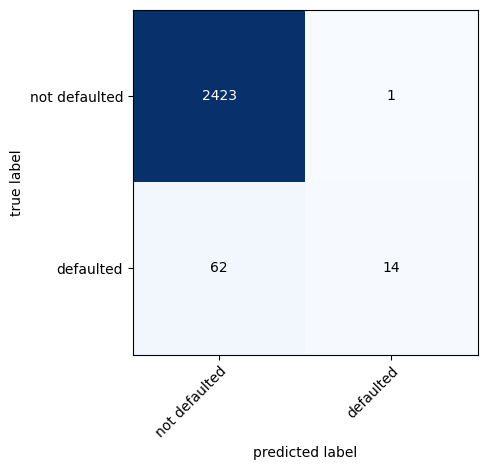

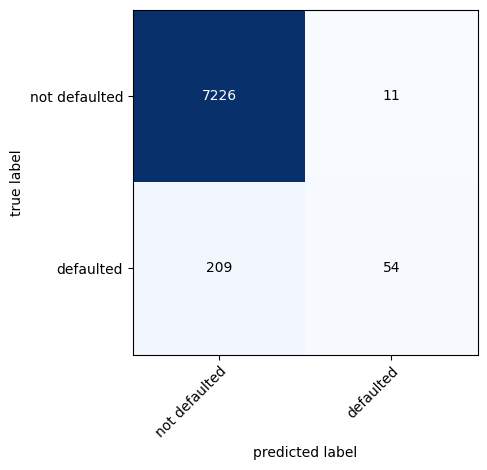

In [17]:
# Confusion matrix of new data
mlx_plot_cm(conf_mat=confusion_matrix(y2_test, lr_model2.predict(x2_test)), class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()
mlx_plot_cm(conf_mat=confusion_matrix(y2_train, lr_model2.predict(x2_train)), class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

In [18]:
roc_2 = plot_roc_curve(lr_model2, x2_test, y2_test, drop_intermediate=False)
youdens_idx2 = np.argmax(roc_2.tpr - roc_2.fpr)
thresholds2 = np.unique(lr_model2.predict_proba(x2_test)[:, 1])
thresholds2.sort()
thresholds2 = [1] + list(thresholds2[::-1])
ythresh2 = thresholds2[youdens_idx2]
ythresh2 


C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.09811397163344523

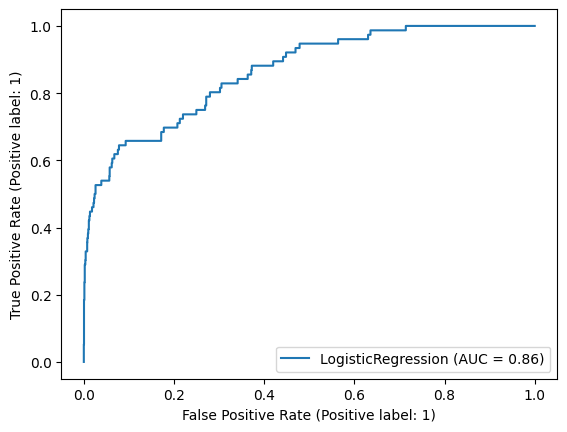

<Figure size 550x550 with 0 Axes>

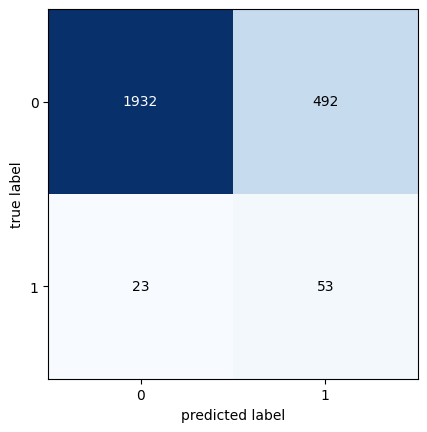

In [19]:

f_2 = plt.figure(figsize=(5.5,5.5))
predictions2 = lr_model2.predict_proba(x2_test)[:, 1] >= ythresh
mlx_plot_cm(confusion_matrix(y2_test, predictions2))
f.tight_layout()
plt.show()

In [20]:
# classification report

print(classification_report(y2_test, lr_model2.predict(x2_test), target_names=['no default', 'default']))

print(classification_report(y2_train, lr_model2.predict(x2_train), target_names=['no default', 'default']))

              precision    recall  f1-score   support

  no default       0.98      1.00      0.99      2424
     default       0.93      0.18      0.31        76

    accuracy                           0.97      2500
   macro avg       0.95      0.59      0.65      2500
weighted avg       0.97      0.97      0.97      2500

              precision    recall  f1-score   support

  no default       0.97      1.00      0.99      7237
     default       0.83      0.21      0.33       263

    accuracy                           0.97      7500
   macro avg       0.90      0.60      0.66      7500
weighted avg       0.97      0.97      0.96      7500



C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


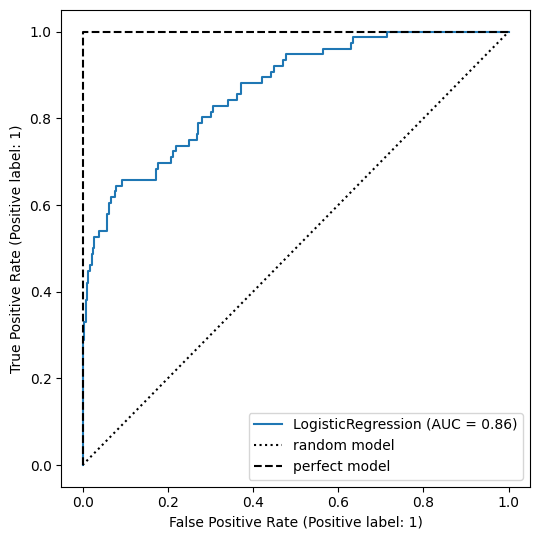

In [21]:
f2, ax2 = plt.subplots(1, 1, figsize=(5.5, 5.5))
roc2 = plot_roc_curve(lr_model2, x2_test, y2_test, ax=ax2)
plt.plot([0,1], [0,1], c='k', linestyle='dotted', label='random model')
plt.plot([0, 0, 1], 
         [0, 1, 1], c='k', linestyle='dashed', label='perfect model')
plt.legend()
plt.tight_layout()
plt.show()

The AUC for the new dataset with the two features removed is 0.85 versus before as 0.83, so I would say the removal of the two features improved the dataset. 

In [22]:
# Downsampling 
from imblearn.under_sampling import RandomUnderSampler 

rus = RandomUnderSampler(random_state=0)
x_dwnsampled, y_dwnsampled = rus.fit_resample(df_reduc.drop('FailureFlag', axis=1), df_reduc['FailureFlag'])
print(y_dwnsampled.value_counts())
print(y2_train.value_counts())

x_train_dwns, x_test_dwns, y_train_dwns, y_test_dwns = train_test_split(x_dwnsampled, y_dwnsampled, 
                                                     train_size=0.75)

0    339
1    339
Name: FailureFlag, dtype: int64
0    7237
1     263
Name: FailureFlag, dtype: int64


In [23]:
# model the downsampled 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

lr_model_dwns = LogisticRegression(max_iter=1000)
lr_model_dwns.fit(x_dwnsampled, y_dwnsampled)
print('ROC/AUC score resampled:', roc_auc_score(y2_test, lr_model_dwns.predict_proba(x2_test)[:, 1]))
print('Accuracy Score resampled:', accuracy_score(y2_test, lr_model_dwns.predict_proba(x2_test)[:,1] >= 0.5))

ROC/AUC score resampled: 0.7772331509466736
Accuracy Score resampled: 0.622


The accuracy score for the resampled, was lower which is not an indication of improvement I believe. 

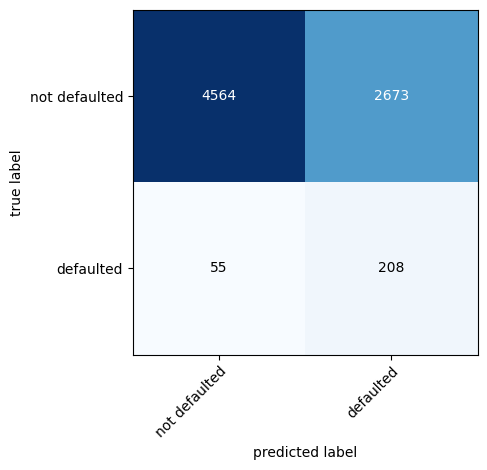

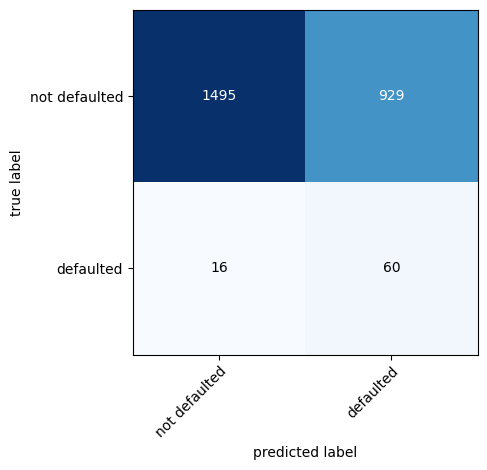

In [24]:
mlx_plot_cm(conf_mat=confusion_matrix(y2_train, lr_model_dwns.predict(x2_train)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()
mlx_plot_cm(conf_mat=confusion_matrix(y2_test, lr_model_dwns.predict(x2_test)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

In [25]:
print(classification_report(y2_test, lr_model_dwns.predict(x2_test), target_names=['no default', 'default']))
print(classification_report(y2_train, lr_model_dwns.predict(x2_train), target_names=['no default', 'default']))

              precision    recall  f1-score   support

  no default       0.99      0.62      0.76      2424
     default       0.06      0.79      0.11        76

    accuracy                           0.62      2500
   macro avg       0.53      0.70      0.44      2500
weighted avg       0.96      0.62      0.74      2500

              precision    recall  f1-score   support

  no default       0.99      0.63      0.77      7237
     default       0.07      0.79      0.13       263

    accuracy                           0.64      7500
   macro avg       0.53      0.71      0.45      7500
weighted avg       0.96      0.64      0.75      7500



In [26]:
# regularization 
scaler = StandardScaler()
scaled_features_dwns = scaler.fit_transform(x_train_dwns)
scaled_lr_dwns = LinearRegression()
scaled_lr_dwns.fit(scaled_features_dwns, y_train_dwns)
print(scaled_lr_dwns.score(scaled_features_dwns, y_train_dwns))


train_features = df_reduc.drop('FailureFlag', axis=1)
train_target = df_reduc['FailureFlag']
lr_sklearn_regu = LogisticRegression(penalty='l1', solver='liblinear')
lr_sklearn_regu.fit(train_features, train_target)
lr_sklearn_regu.score(train_features, train_target)


0.38735575476479533


C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.9709

In [27]:
from sklearn.linear_model import LogisticRegressionCV

lr_cv = LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], solver='liblinear', penalty='l1', n_jobs=-1, random_state=42)
lr_cv.fit(x_dwnsampled, y_dwnsampled)

C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10, 100], n_jobs=-1, penalty='l1',
                     random_state=42, solver='liblinear')

In [28]:
lr_cv.C_

array([10.])

[0.69622004 0.70360566 0.76995643 0.7714488  0.77143791]


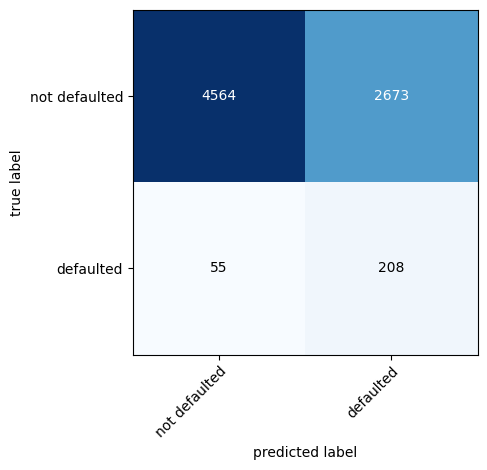

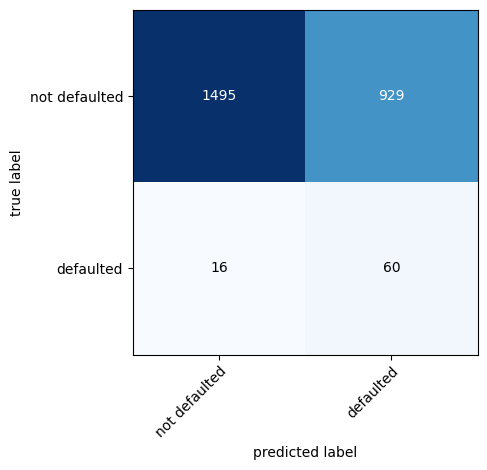

              precision    recall  f1-score   support

  no default       0.99      0.62      0.76      2424
     default       0.06      0.79      0.11        76

    accuracy                           0.62      2500
   macro avg       0.53      0.70      0.44      2500
weighted avg       0.96      0.62      0.74      2500

              precision    recall  f1-score   support

  no default       0.99      0.63      0.77      7237
     default       0.07      0.79      0.13       263

    accuracy                           0.64      7500
   macro avg       0.53      0.71      0.45      7500
weighted avg       0.96      0.64      0.75      7500



In [29]:
print(lr_cv.scores_[1].mean(axis=0))

mlx_plot_cm(conf_mat=confusion_matrix(y2_train, lr_model_dwns.predict(x2_train)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()
mlx_plot_cm(conf_mat=confusion_matrix(y2_test, lr_model_dwns.predict(x2_test)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

print(classification_report(y2_test, lr_model_dwns.predict(x2_test), target_names=['no default', 'default']))
print(classification_report(y2_train, lr_model_dwns.predict(x2_train), target_names=['no default', 'default']))

This indicates our best value for when C is 10. There was some improvement with the regularization method.  

C:\Users\lilye\anaconda3\envs\newbase\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.21228304405874499


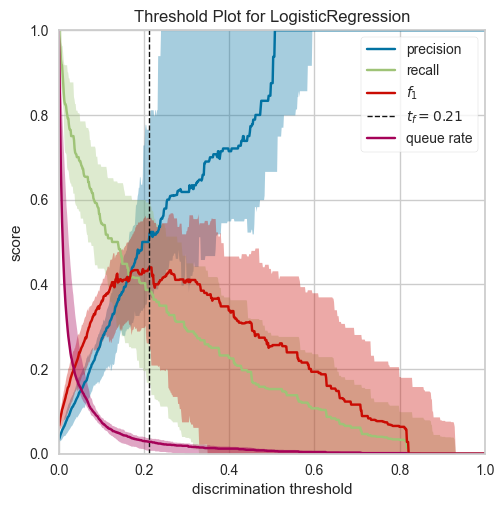

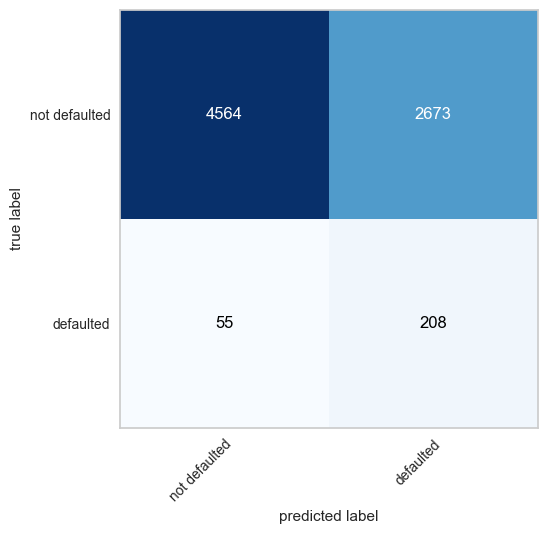

              precision    recall  f1-score   support

  no default       0.99      0.63      0.77      7237
     default       0.07      0.79      0.13       263

    accuracy                           0.64      7500
   macro avg       0.53      0.71      0.45      7500
weighted avg       0.96      0.64      0.75      7500

ROC/AUC score resampled: 0.7772331509466736
Accuracy Score resampled: 0.622


In [30]:
from yellowbrick.classifier.threshold import discrimination_threshold

f = plt.figure(figsize=(5.5, 5.5))
dt = discrimination_threshold(lr_model_dwns, x2_train, y2_train, show=False)

f_idx = dt.cv_scores_['fscore'].argmax()
f_thresh = dt.thresholds_[f_idx]
print(f_thresh)

mlx_plot_cm(conf_mat=confusion_matrix(y2_train, lr_model_dwns.predict(x2_train)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

print(classification_report(y2_train, lr_model_dwns.predict(x2_train), target_names=['no default', 'default']))
print('ROC/AUC score resampled:', roc_auc_score(y2_test, lr_model_dwns.predict_proba(x2_test)[:, 1]))
print('Accuracy Score resampled:', accuracy_score(y2_test, lr_model_dwns.predict_proba(x2_test)[:,1] >= 0.5))

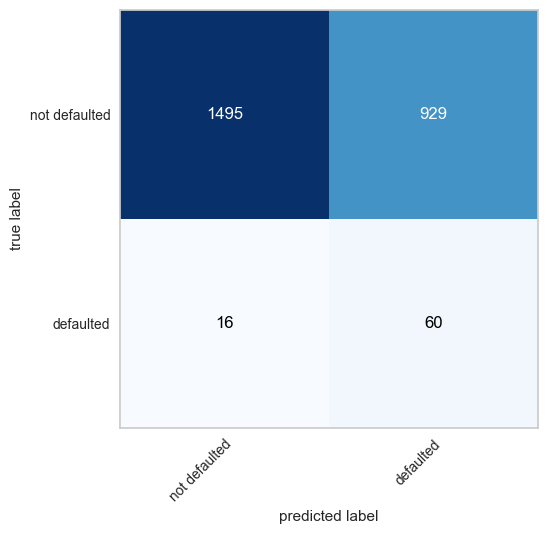

              precision    recall  f1-score   support

  no default       0.99      0.62      0.76      2424
     default       0.06      0.79      0.11        76

    accuracy                           0.62      2500
   macro avg       0.53      0.70      0.44      2500
weighted avg       0.96      0.62      0.74      2500



In [31]:
# predicting test data 
mlx_plot_cm(conf_mat=confusion_matrix(y2_test, lr_model_dwns.predict(x2_test)), 
            class_names=['not defaulted', 'defaulted'])
plt.tight_layout()
plt.show()

print(classification_report(y2_test, lr_model_dwns.predict(x2_test), target_names=['no default', 'default']))